In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# https://www.kaggle.com/datasets/asaniczka/data-scientist-linkedin-job-postings
import os
import kagglehub
# Download latest version
path = kagglehub.dataset_download("asaniczka/data-scientist-linkedin-job-postings")

print("Path to dataset files:", path)
files = os.listdir(path)
# Print the names of the files
for file in files:
    print(file)

Path to dataset files: /Users/Cecilia/.cache/kagglehub/datasets/asaniczka/data-scientist-linkedin-job-postings/versions/103
postings.csv


In [7]:
df = pd.read_csv(path+'/postings.csv')
df.head(3)

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
0,Technical Data Analyst,Jefferson Health Plans,"Philadelphia, PA",https://www.linkedin.com/jobs/view/technical-d...,2023-12-20,Phoenixville,United States,Associate,Remote,Why Choose Jefferson Health Plans?\nWe are an ...,"KNIME, QlikView, SQL, MS Access, MS Excel, Log..."
1,Data Center Engineer - Minneapolis,DeRisk Technologies,"Minneapolis, MN",https://www.linkedin.com/jobs/view/data-center...,2023-12-20,Minneapolis,United States,Associate,Onsite,Job Responsibilities:\nDeployment / In-Scope C...,"Server, Storage, Backup, Networking, Virtualiz..."
2,Data Analyst,Avani Tech Solutions Private Limited,"Minneapolis, MN",https://www.linkedin.com/jobs/view/data-analys...,2023-12-20,Minneapolis,United States,Associate,Onsite,Success Factor knowledge\nSchedule : Monday th...,"Data Management, HR Data Retention Controls, C..."


In [8]:
df.shape

(4342, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4342 entries, 0 to 4341
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       4342 non-null   object
 1   company         4342 non-null   object
 2   job_location    4342 non-null   object
 3   job_link        4342 non-null   object
 4   first_seen      4342 non-null   object
 5   search_city     4342 non-null   object
 6   search_country  4342 non-null   object
 7   job level       4342 non-null   object
 8   job_type        4342 non-null   object
 9   job_summary     4338 non-null   object
 10  job_skills      4336 non-null   object
dtypes: object(11)
memory usage: 373.3+ KB


In [10]:
df.isnull().sum()

job_title         0
company           0
job_location      0
job_link          0
first_seen        0
search_city       0
search_country    0
job level         0
job_type          0
job_summary       4
job_skills        6
dtype: int64

In [11]:
df.fillna(method='ffill', inplace=True)
print(df.isnull().sum())

job_title         0
company           0
job_location      0
job_link          0
first_seen        0
search_city       0
search_country    0
job level         0
job_type          0
job_summary       0
job_skills        0
dtype: int64


/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_93259/3035272055.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


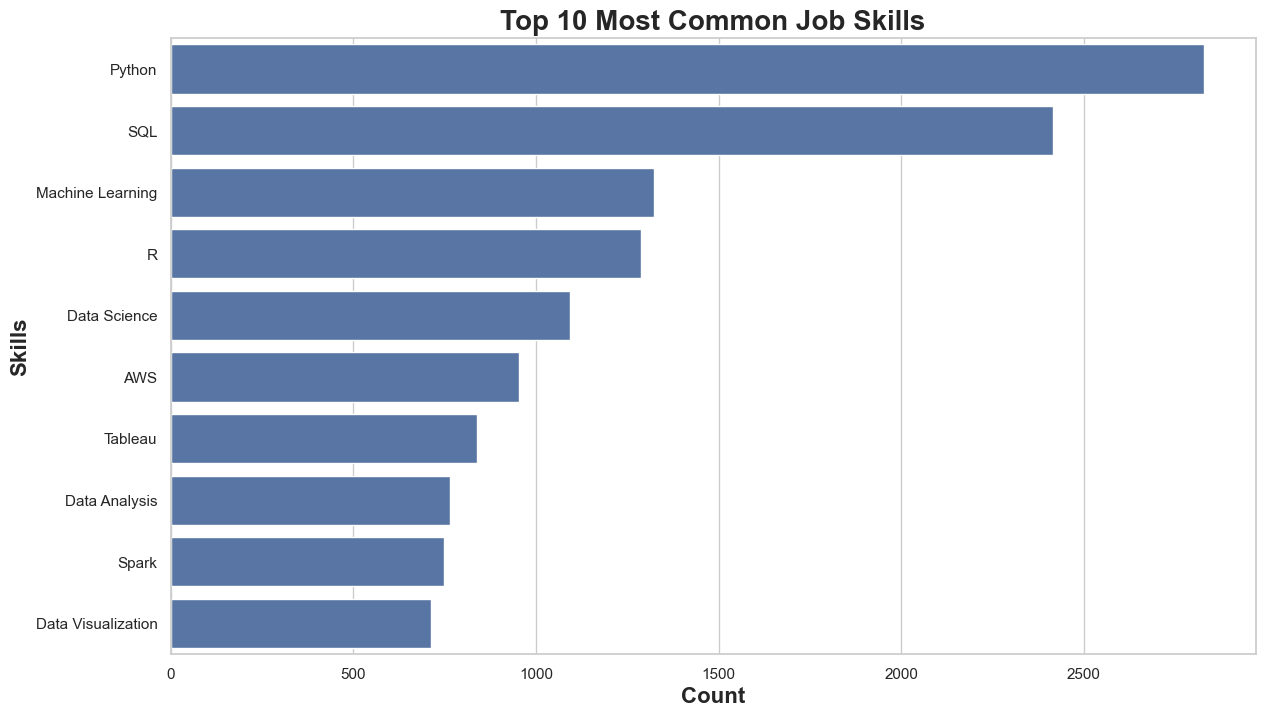

In [29]:
#Most Common Skillset For Data Scientist
df['job_skills'].astype(str)
df['Individual Skill'] = df['job_skills'].str.split(', ')
df_exploded = df.explode('Individual Skill')

skills_count = df_exploded['Individual Skill'].value_counts().reset_index()
skills_count.columns = ['Skill', 'Count']

plt.figure(figsize=(14, 8))
sns.barplot(data=skills_count.head(10), x='Count', y='Skill')
plt.title('Top 10 Most Common Job Skills', fontsize=20, fontweight='bold')
plt.xlabel('Count', fontsize=16, fontweight='bold')
plt.ylabel('Skills', fontsize=16, fontweight='bold')
plt.show()

As seen in the above graph, we can conclude that if a fresher or a person who wants to switch into Data Science domain, can start learning the top skills that are posted by the Employer or in the job postings, and can start acquiring these skills.

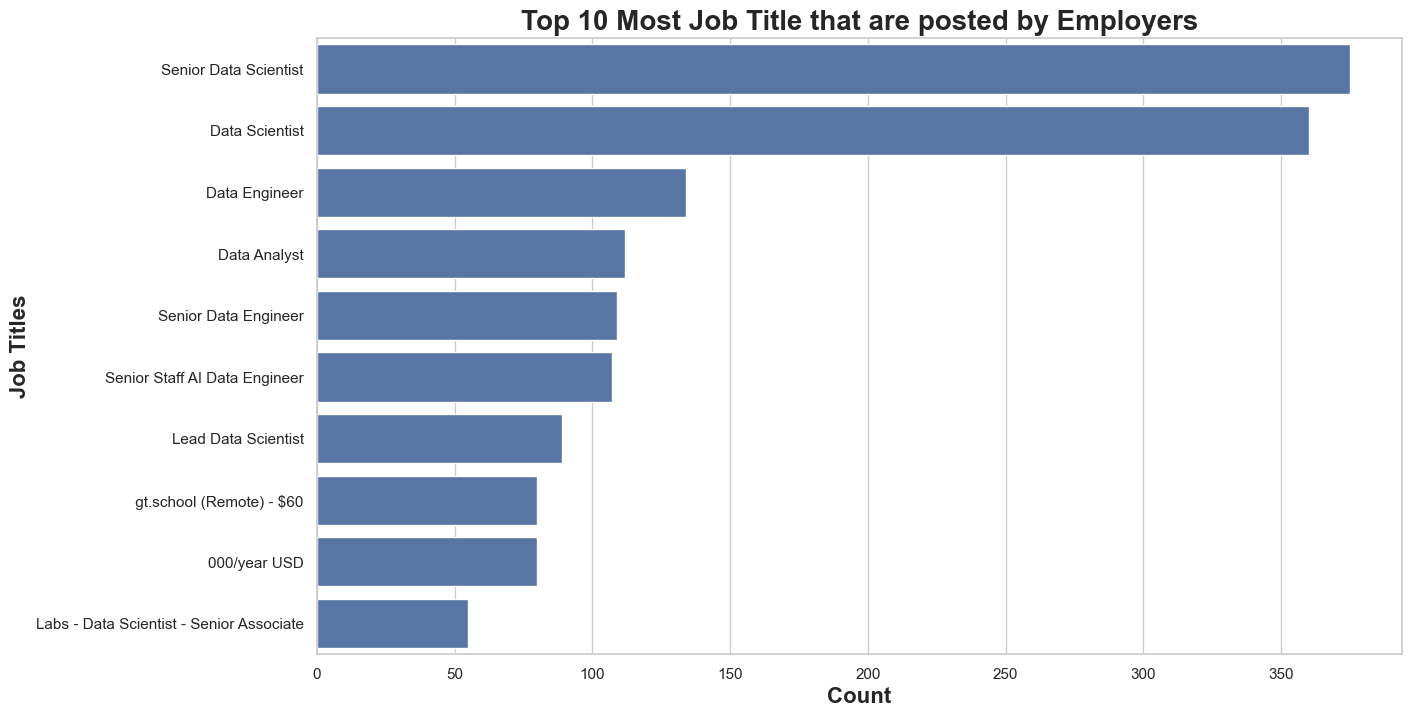

In [30]:
#top 10 in-demand job titles that the employers are looking for.
df['job_title'].astype(str)
df['Individual Job Titles'] = df['job_title'].str.split(',')
df_title_exploded = df.explode('Individual Job Titles')

title_count = df_title_exploded['Individual Job Titles'].value_counts().reset_index()
title_count.columns = ['Title','Count']

plt.figure(figsize=(14,8))
sns.barplot(data=title_count.head(10), x='Count',y='Title')
plt.title('Top 10 Most Job Title that are posted by Employers', fontsize=20, fontweight='bold')
plt.xlabel('Count', fontsize=16, fontweight='bold')
plt.ylabel('Job Titles', fontsize=16, fontweight='bold')
plt.show()

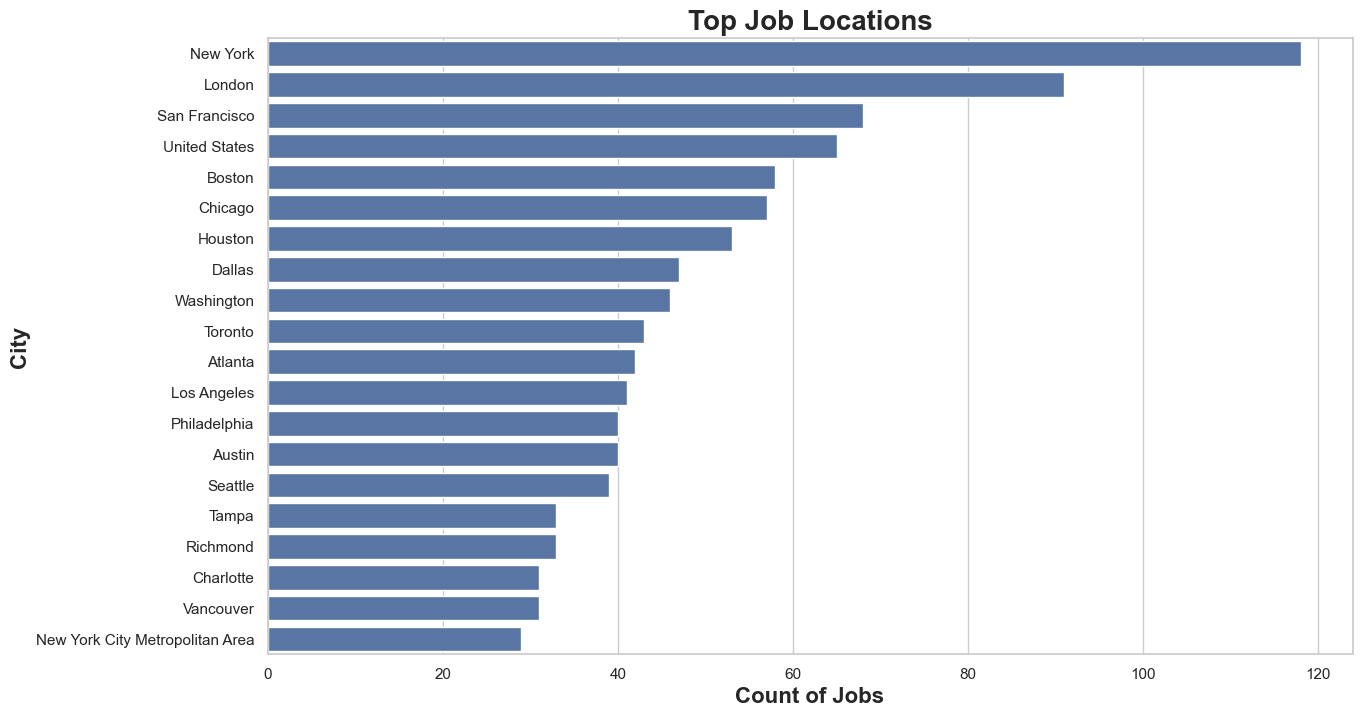

In [22]:
#the top 20 Job Location 
df['job_location'].astype(str)
df['City'] = df['job_location'].apply(lambda x: x.split(', ')[0])
df_location_exploded = df.explode('City')

city_count = df_location_exploded['City'].value_counts().reset_index()
city_count.columns = ['City', 'Count']

plt.figure(figsize=(14, 8))
sns.barplot(data=city_count.head(20), x='Count', y='City')
plt.title('Top Job Locations', fontsize=20, fontweight='bold')
plt.xlabel('Count of Jobs', fontsize=16, fontweight='bold')
plt.ylabel('City', fontsize=16, fontweight='bold')
plt.show()

/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_93259/389205719.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_type_count.index,y=job_type_count.values,palette='viridis')


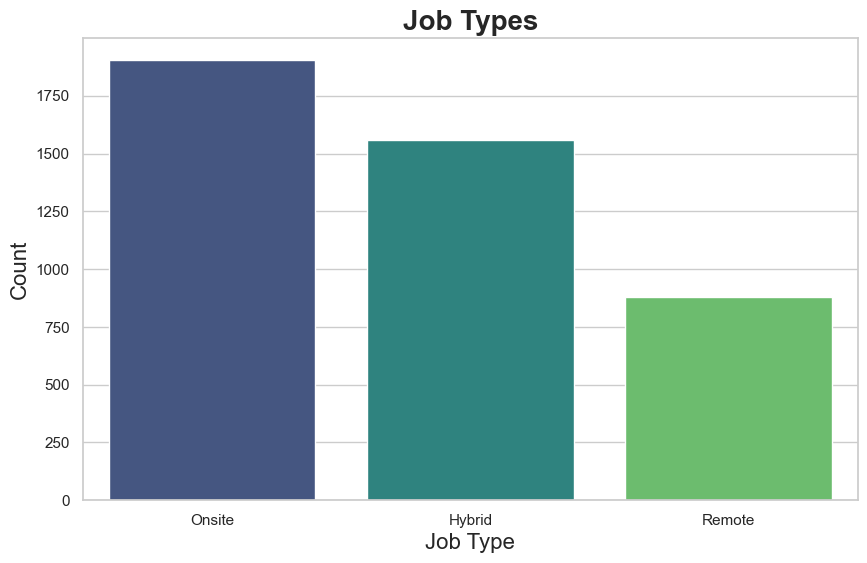

In [24]:
#distribution of job types
job_type_count = df['job_type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=job_type_count.index,y=job_type_count.values,palette='viridis')
plt.title('Job Types', fontsize=20,fontweight='bold')
plt.xlabel('Job Type',fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_93259/2824200348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_level_count.index, y=job_level_count.values, palette='viridis')


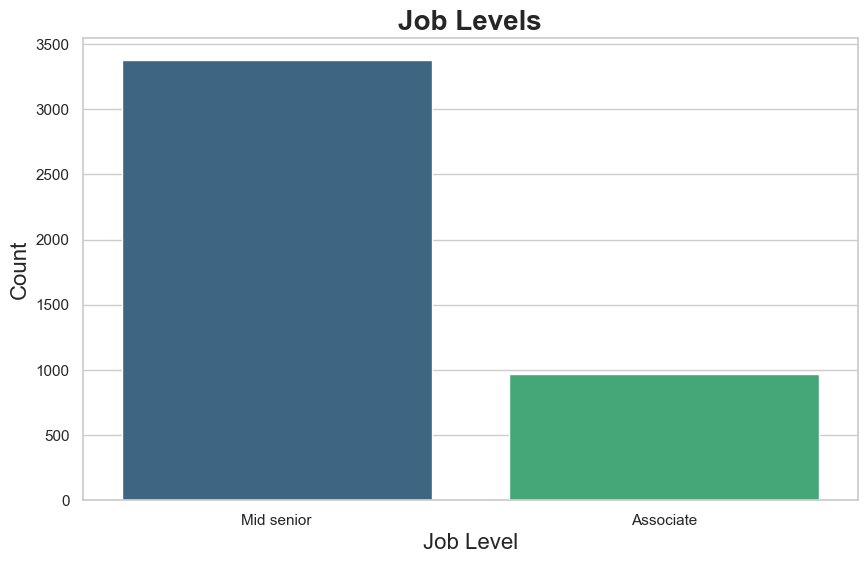

In [25]:
job_level_count = df['job level'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=job_level_count.index, y=job_level_count.values, palette='viridis')
plt.title('Job Levels', fontsize=20, fontweight='bold')
plt.xlabel('Job Level', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()


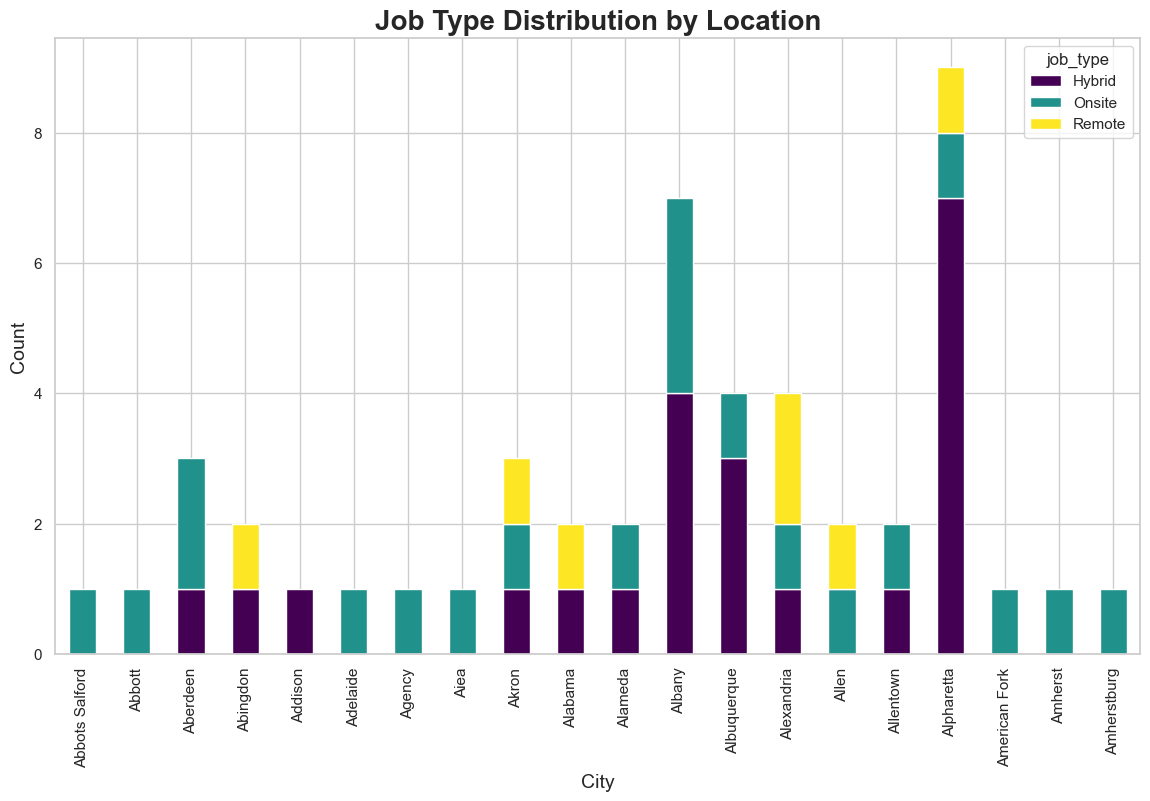

In [26]:
job_type_by_location = df.groupby(['City', 'job_type']).size().unstack(fill_value=0).head(20)

# Plot the data
job_type_by_location.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Job Type Distribution by Location', fontsize=20, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [33]:
df.groupby(['job level', 'job_type']).count()

job_title  company  job_location  job_link  first_seen  \
job level  job_type                                                           
Associate  Hybrid          327      327           327       327         327   
           Onsite          435      435           435       435         435   
           Remote          204      204           204       204         204   
Mid senior Hybrid         1231     1231          1231      1231        1231   
           Onsite         1469     1469          1469      1469        1469   
           Remote          676      676           676       676         676   

                     search_city  search_country  job_summary  job_skills  \
job level  job_type                                                         
Associate  Hybrid            327             327          327         327   
           Onsite            435             435          435         435   
           Remote            204             204          204         204   
Mid senior Hybrid           1231            1231         1231        1231   
           Onsite           1469            1469         1469        1469   
           Remote            676             676          676         676   

                     Individual Skill  Individual Job Titles  City  
job level  job_type                                                 
Associate  Hybrid                 327                    327   327  
           Onsite                 435                    435   435  
           Remote                 204                    204   204  
Mid senior Hybrid                1231                   1231  1231  
           Onsite                1469                   1469  1469  
           Remote                 676                    676   676

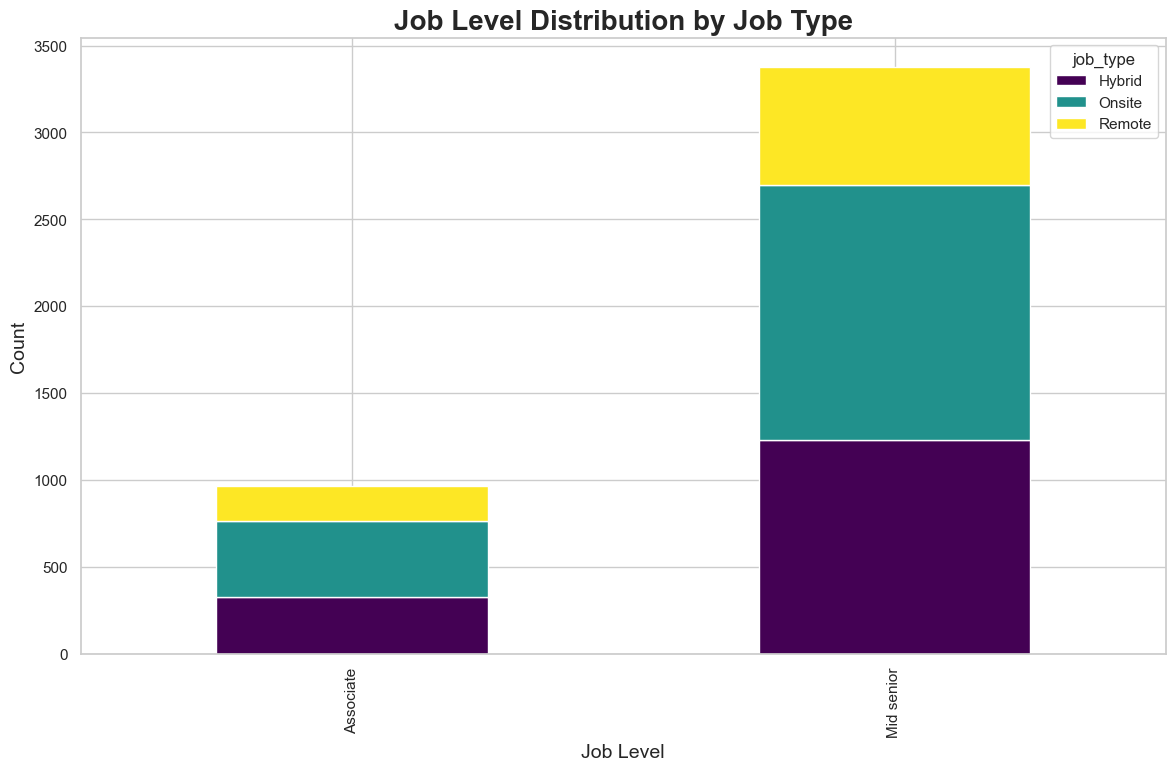

In [27]:
job_level_by_type = df.groupby(['job level', 'job_type']).size().unstack(fill_value=0)

# Plot the data
job_level_by_type.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Job Level Distribution by Job Type', fontsize=20, fontweight='bold')
plt.xlabel('Job Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()